### About Dataset

#### Context
This project focuses on understanding and predicting deaths rate respective to the state's political representation. Understanding the political dynamics involved in deaths surge is essential for assessing the effectiveness of governance and policy decisions in addressing public health challenges.

#### Content
There are three files.
a) Latest COVID-19 Mortality by State
b) COVID-19 Vaccine Distribution Allocations by Jurisdiction - Janssen
c) US State Use of COVID-19 Vaccine Incentives (JAMA Netw Open)

#### Feature Information for COVID19 vaccination Tracker file
state, doses distributed per 100k pop, deaths per 100k pop, political affiliation, year

#### Feature Information for US State Use of COVID-19 Vaccine Incentives (JAMA Netw Open)
Political Affiliation, Non-incentive, Covid-19 mitigation policy,Lottery,Guaranteed

#### Source
URL1: https://www.cdc.gov/nchs/pressroom/sosmap/covid19_mortality_final/COVID19.htm

URL2:https://data.cdc.gov/Vaccinations/COVID-19-Vaccine-Distribution-Allocations-by-Juris/w9zu-fywh/about_data

URL3: US State Use of COVID-19 Vaccine Incentives (JAMA Netw Open. 2022 Oct; 5(10):e2235328)




In [49]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [50]:
# import data

data=pd.read_csv('Project 2 - DATA- USA_convid 19_vaccines_2023 (4).csv')
data.rename(columns=lambda x: x.lower(), inplace=True)
data.rename(columns={}, inplace=True)

data.head()

,state,doses distributed per 100k pop,deaths per 100k pop,political affiliation,year
0,Alaska,297462,109.5,R,2021
1,Alabama,251868,152.8,R,2021
2,Arkansas,277460,127.7,R,2021
3,Arizona,274212,139.5,D,2021
4,California,306507,99.9,D,2021


### 1. Data Cleaning and Processing

In [51]:
data.dtypes 
#To know whether I'm dealing with numerical or categorical data

state                              object
doses distributed per 100k pop      int64
deaths per 100k pop               float64
political affiliation              object
year                                int64
dtype: object

In [52]:
#data size
data.shape

(50, 5)

In [53]:
#missing values
data.isnull().sum()

state                             0
doses distributed per 100k pop    0
deaths per 100k pop               0
political affiliation             0
year                              0
dtype: int64

#### There is no missing value in this case. 

In [54]:
# check duplicated values
data.duplicated().sum()

0

In [55]:
#clean data to remove Nan values
clean_df = data.dropna()


In [56]:
# getting the statistical summary of dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
doses distributed per 100k pop,50.0,296858.740,41125.594778,221178.0,270732.500,291621.0,329887.50,414902.0
deaths per 100k pop,50.0,99.316,33.853890,29.5,71.125,101.5,133.85,158.8
year,50.0,2021.000,0.000000,2021.0,2021.000,2021.0,2021.00,2021.0


In [57]:
#Checking the values of x equal to zero
data.loc[data['deaths per 100k pop']==0]


,state,doses distributed per 100k pop,deaths per 100k pop,political affiliation,year


### Hot encoding and transformations

In [58]:

pd.get_dummies(data['state'], prefix='state').head()
pd.get_dummies(data['political affiliation'], prefix='political affiliation').head()



,political affiliation_D,political affiliation_R
0,False,True
1,False,True
2,False,True
3,True,False
4,True,False


### Exploratory Data Analysis

In [59]:
numerical_features = ['doses distributed per 100k pop', 'deaths per 100k pop','year']

categorical_features = ['political affiliation','state']

In [60]:
def desc_num_feature(feature_name, bins=30, edgecolor='k', **kwargs):
    fig, ax = plt.subplots(figsize=(8,4))
    data[feature_name].hist(bins=bins, edgecolor=edgecolor, ax=ax, **kwargs)
    ax.set_title(feature_name, size=15)
    plt.figtext(1,0.15, str(data[feature_name].describe().round(2).astype(str)), size=17)

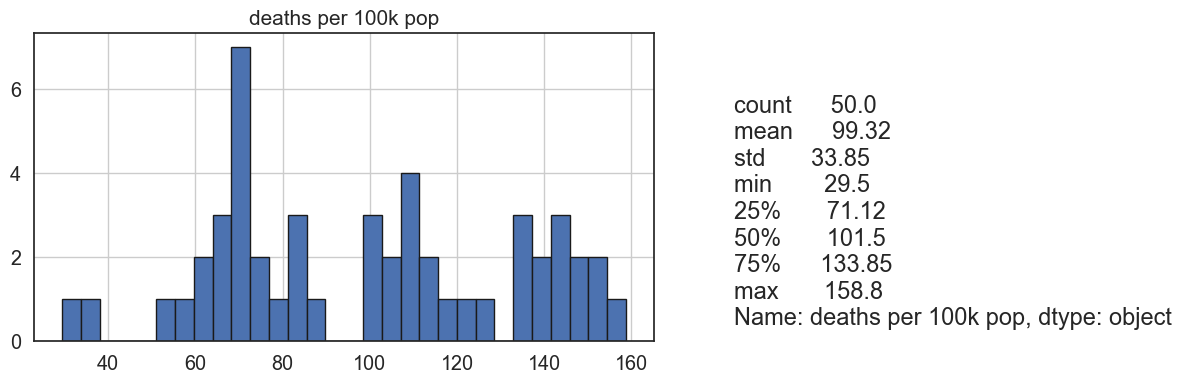

In [61]:
desc_num_feature('deaths per 100k pop')

                       count  percent
political affiliation                
R                         27     54.0
D                         23     46.0


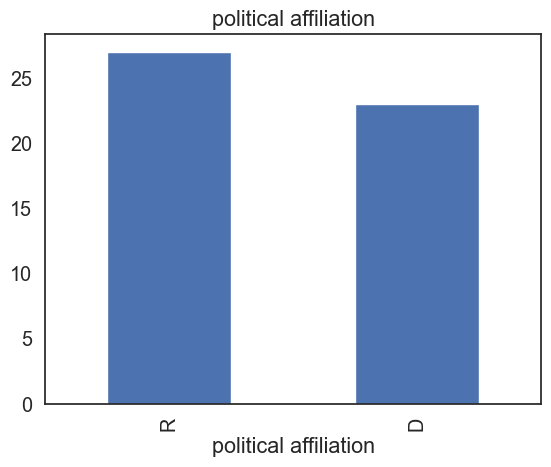

In [62]:
feature = categorical_features[0]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

In [63]:
pd.crosstab(data['state'], data['political affiliation'])  

political affiliation,D,R
state,,
Alabama,0,1
Alaska,0,1
Arizona,1,0
Arkansas,0,1
California,1,0
Colorado,1,0
Connecticut,1,0
Delaware,1,0
Florida,0,1


/var/folders/4_/4vpfyj9x1zs61yhjztnqgbsr0000gn/T/ipykernel_39050/2838089411.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['deaths per 100k pop'],


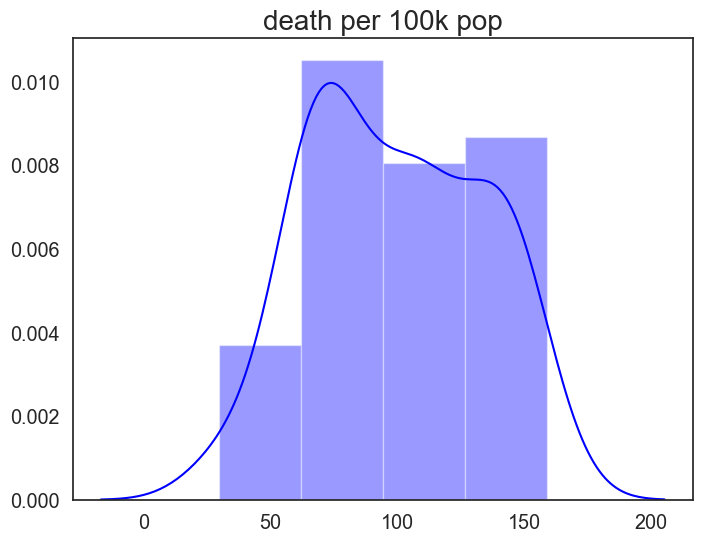

In [64]:
# Efficiency based analysis
sns.set(font_scale=1.3)

plt.figure(figsize=(8,6))
sns.set_style("white")
sns.distplot(data['deaths per 100k pop'],
             color='blue',
             kde=True)


plt.title("death per 100k pop",fontsize=20)
plt.xlabel("",fontsize=16)
plt.ylabel("",fontsize=16)
plt.show()

Most of the juridictions have a total death per  100k pop betweeen 60 and 100.

<Axes: xlabel='deaths per 100k pop'>

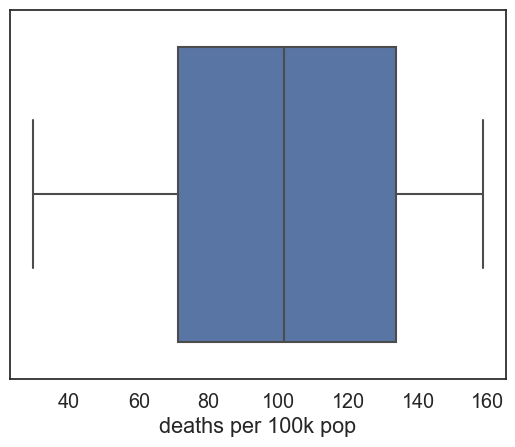

In [65]:
#spot outliers
sns.boxplot(x=data['deaths per 100k pop'])

/Users/maduffaut/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


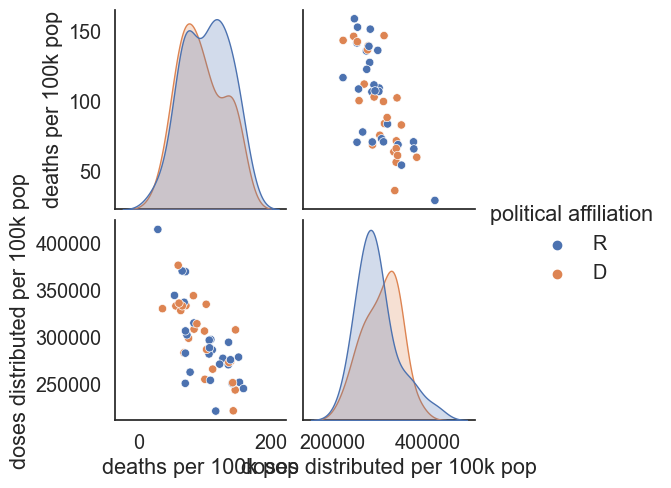

In [66]:
sample_data=data.sample(n=50)
sns.pairplot(data=data,vars=['deaths per 100k pop', 'doses distributed per 100k pop'], hue='political affiliation')
plt.show()

### Feature Engineering

In [67]:
#Normalizing the data to eliminate redundant data, 
#minimize data modification errors, and simplify the query process.
from sklearn import preprocessing

In [68]:
doses_array = np.array(data['doses distributed per 100k pop'])
print("doses array: ",doses_array)

doses array:  [297462 251868 277460 274212 306507 308560 333264 344234 286467 270569
 330391 298858 265895 302474 282071 286846 273095 221178 344540 369848
 370555 296773 328377 255062 243682 254008 288692 250749 283379 376683
 333675 294550 250727 315125 271223 245196 337198 335071 333360 275902
 306675 251458 278706 262695 314259 414902 336268 282943 307779 221466]


In [69]:
doses_array = np.array(data['deaths per 100k pop'])

In [72]:

normalized_arr = preprocessing.normalize([doses_array])
print("Normalized deaths array: ",normalized_arr)

Normalized deaths array:  [[0.14773822 0.20615891 0.1722938  0.18821445 0.13478583 0.11360327
  0.07650007 0.11225407 0.15070648 0.1833573  0.04924607 0.10240485
  0.15151601 0.09903183 0.14409536 0.1391033  0.18443667 0.15772236
  0.07366673 0.09606358 0.08931754 0.14450013 0.0864842  0.13559536
  0.19738906 0.14679378 0.14503981 0.09565881 0.09309532 0.08122229
  0.09700802 0.18389699 0.19104779 0.11319851 0.16568268 0.21425416
  0.09336516 0.13829377 0.08958738 0.18780969 0.09606358 0.19226207
  0.20427002 0.10550803 0.11940487 0.03980162 0.08297626 0.09592866
  0.19806367 0.19347636]]


In [73]:
deaths_per_100k_pop_array = np.array(data['deaths per 100k pop'])
normalized_arr = preprocessing.normalize([deaths_per_100k_pop_array])
print("Normalized deaths per 100k pop: ",normalized_arr)

Normalized deaths per 100k pop:  [[0.14773822 0.20615891 0.1722938  0.18821445 0.13478583 0.11360327
  0.07650007 0.11225407 0.15070648 0.1833573  0.04924607 0.10240485
  0.15151601 0.09903183 0.14409536 0.1391033  0.18443667 0.15772236
  0.07366673 0.09606358 0.08931754 0.14450013 0.0864842  0.13559536
  0.19738906 0.14679378 0.14503981 0.09565881 0.09309532 0.08122229
  0.09700802 0.18389699 0.19104779 0.11319851 0.16568268 0.21425416
  0.09336516 0.13829377 0.08958738 0.18780969 0.09606358 0.19226207
  0.20427002 0.10550803 0.11940487 0.03980162 0.08297626 0.09592866
  0.19806367 0.19347636]]


In [79]:
#Binning numerical data to make it categorical 
#grouping multiple values into a single category.

# Bin the Efficiency column into 3 equal-sized bins
data['deaths per 100k pop_bin'] = pd.cut(data['deaths per 100k pop'], bins=[0,50,100,150], labels=["Low", "Mid", "High"])
data['deaths per 100k pop_bin']

0     High
1      NaN
2     High
3     High
4      Mid
5      Mid
6      Mid
7      Mid
8     High
9     High
10     Low
11     Mid
12    High
13     Mid
14    High
15    High
16    High
17    High
18     Mid
19     Mid
20     Mid
21    High
22     Mid
23    High
24    High
25    High
26    High
27     Mid
28     Mid
29     Mid
30     Mid
31    High
32    High
33     Mid
34    High
35     NaN
36     Mid
37    High
38     Mid
39    High
40     Mid
41    High
42     NaN
43     Mid
44     Mid
45     Low
46     Mid
47     Mid
48    High
49    High
Name: deaths per 100k pop_bin, dtype: category
Categories (3, object): ['Low' < 'Mid' < 'High']

### Splitting the dataset

In [80]:
#encoding categorical fetaure
data['political affiliation_bin'] = (data['political affiliation'] == 1).astype('int')

In [89]:
numerical_features = ['doses distributed per 100k pop', 'deaths per 100k pop','year']
binary_features = ['political affiliation_bin']
X = data[numerical_features + binary_features]
y = data['deaths per 100k pop']

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=5/30, random_state=49)

In [99]:
#Import the class you to use
from sklearn.preprocessing import StandardScaler

#Create an instance of the class
scaler = StandardScaler()

#Use the fit method of the instance
scaler.fit(X_train[numerical_features])

#Use the transform method to perform the transformation
X_train.loc[:, numerical_features] = scaler.transform(X_train[numerical_features])

### complete Logistic Regression model

In [101]:
#model training using all selected features
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C=1e6)
log_reg.fit(X_train, y_train)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [102]:
prob_log_reg = log_reg.predict_proba(X_train)
prob_log_reg[:30]

AttributeError: 'LogisticRegression' object has no attribute 'classes_'

##### Here, we have the first 30 predicted probabilities for the training data:

In [32]:
y_pred_log_reg = log_reg.predict(X_train)
y_pred_log_reg[:30]

array(['R', 'R', 'R', 'R', 'D', 'R', 'R', 'D', 'D', 'R', 'R', 'R', 'R',
       'R', 'R', 'D', 'D', 'R', 'R', 'D', 'R', 'R', 'R', 'D', 'R', 'D',
       'R', 'R', 'R', 'R'], dtype=object)

In [33]:
np.all(y_pred_log_reg == (prob_log_reg[:,1] > 0.5))

False

In [34]:
pd.Series(data=log_reg.coef_[0], index=X_train.columns).sort_values(ascending=False).round(2)

deaths per 100k pop               0.07
year                              0.00
doses distributed per 100k pop   -0.42
dtype: float64

##### Finally, we have the coefficients associated with each of the features used:

In [35]:
from sklearn.metrics import accuracy_score
accuracy_log_reg = accuracy_score(y_true=y_train, y_pred=y_pred_log_reg)
accuracy_log_reg

0.675

##### 67.5% of the predictions made in the training set are correct.

### Classification Trees

In [36]:
from sklearn.tree import DecisionTreeClassifier
class_tree = DecisionTreeClassifier(max_depth=3)
class_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [37]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=23,
                            max_features=3,
                            max_depth=3,
                            min_samples_split=20,
                            random_state=49)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_train)

In [39]:
accuracy_rf = accuracy_score(y_true=y_train, y_pred=y_pred_rf)
accuracy_rf

0.75

In [40]:
pd.Series(data=rf.feature_importances_, index=X_train.columns).sort_values(ascending=False).round(3)


doses distributed per 100k pop    0.657
deaths per 100k pop               0.343
year                              0.000
dtype: float64

##### 75% of the target feature is accurate.

### Training vs Testing Error

In [41]:
from sklearn.metrics import accuracy_score

y_pred_null = np.zeros_like(y_test)
accuracy_score(y_true=y_test, y_pred=y_pred_null)

ValueError: Classification metrics can't handle a mix of binary and unknown targets

In [83]:
#standarize the numerical features in the testing set
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [114]:
# Calculating accuracy
accuracies = pd.DataFrame(columns=['train', 'test'], index=['LogisticReg','ClassTree','RF'])
model_dict = {'LogisticReg': log_reg, 'ClassTree': class_tree, 'RF': rf}
for name, model in model_dict.items():
    accuracies.loc[name, 'train'] = accuracy_score(y_true=y_train, y_pred=model.predict(X_train))
    accuracies.loc[name, 'test'] = accuracy_score(y_true=y_test, y_pred=model.predict(X_test))

accuracies

,train,test
LogisticReg,0.675,0.5
ClassTree,0.8,0.5
RF,0.75,0.5


##### The 3 models are performing inequally.

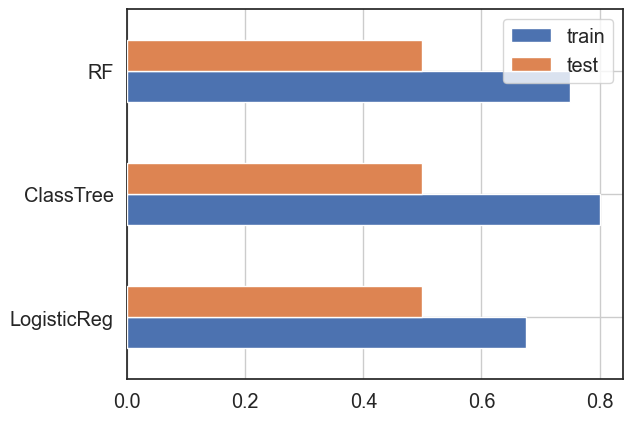

In [115]:
#models traning vizualization
fig, ax = plt.subplots()
accuracies.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

### Performance metrics

In [116]:
from sklearn.linear_model import LinearRegression
ml_reg = LinearRegression()
ml_reg.fit(X_train, y_train)
y_pred = ml_reg.predict(X_test)

ValueError: could not convert string to float: 'D'

In [117]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=23,
                            max_features=3,
                            max_depth=3,
                            random_state=40)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=3, n_estimators=23,
                       random_state=40)

In [118]:
#Root Mean Squared Error

from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_true=y_test, y_pred=y_pred)**0.5
print("RMSE: {:,.2f}".format(rmse))


NameError: name 'y_pred' is not defined

In [119]:
##Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
print("MAE: {:,.2f}".format(mae))

NameError: name 'y_pred' is not defined

In [120]:
## R-squared (R2)
from sklearn.metrics import r2_score
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print("R-squared: {:,.2f}".format(r2))

NameError: name 'y_pred' is not defined

In [121]:
eval_df = pd.DataFrame({"y_true": y_test, "y_pred": y_pred, "residuals": y_test - y_pred})


NameError: name 'y_pred' is not defined

In [122]:
## Costum metric: Percentage of Predictions Within Acceptable Error
eval_df["prop_error"] = eval_df["residuals"].abs()/eval_df["y_true"]


NameError: name 'eval_df' is not defined

In [95]:
costum_metric = 100*(eval_df["prop_error"] < 0.15).mean()
print("Costum metric: {:,.1f}%".format(costum_metric))

NameError: name 'eval_df' is not defined

### Model Visualization

In [96]:
## Distributions of residuals
eval_df["residuals"].hist(bins=25, ec='k');


NameError: name 'eval_df' is not defined

In [97]:
(eval_df["residuals"] <=0).mean()

NameError: name 'eval_df' is not defined

NameError: name 'eval_df' is not defined

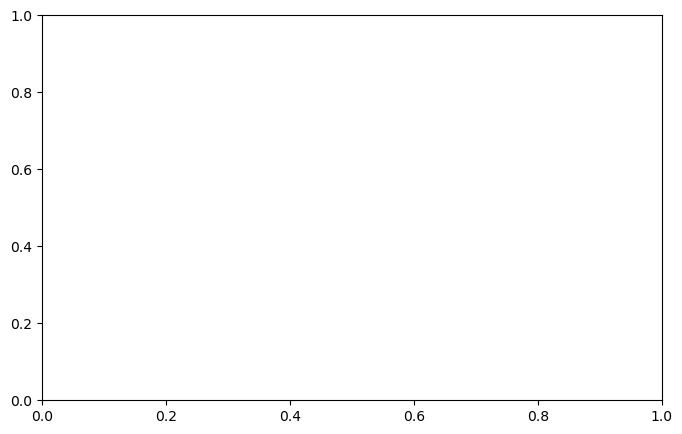

In [98]:
## Observed vs. predicted values plot
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(eval_df["y_true"], eval_df["y_pred"], s=3)
ax.plot(eval_df["y_true"], eval_df["y_true"], color='red')
ax.set_title('Predictions vs. observed values', fontsize=16)
ax.set_xlabel('Observed target', fontsize=14)
ax.set_ylabel('Predicted target', fontsize=14)
ax.grid();

In [99]:
eval_df["y_pred"].loc[eval_df["y_pred"]<0][:5]


NameError: name 'eval_df' is not defined

NameError: name 'eval_df' is not defined

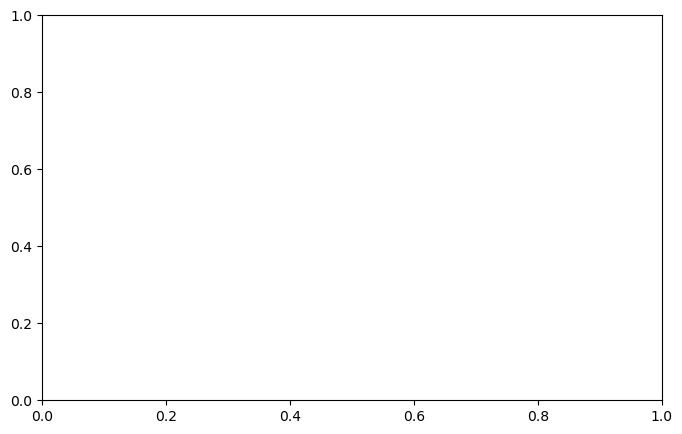

In [100]:
##Predicted values vs. residuals
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(eval_df["y_pred"], eval_df["residuals"], s=3)
ax.set_title('Predictions vs. residuals', fontsize=16)
ax.set_xlabel('Predictions', fontsize=14)
ax.set_ylabel('Residuals', fontsize=14)
ax.axhline(color='k'); ax.axvline(color='k');
ax.grid();

### K-fold cross validation for model evaluation

In [75]:
## Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

## Standardize the numeric features 
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train.loc[:, numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

## Model training
ml_reg = LinearRegression()
ml_reg.fit(X_train, y_train)

## predictions
y_pred = ml_reg.predict(X_test)

## Evaluate the model using the same metric
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
print("MAE: {:,.2f}".format(mae))

MAE: 0.00


In [76]:
from sklearn.model_selection import cross_validate, RepeatedKFold

## Scaling the whole dataset
scaler = StandardScaler()
scaler.fit(X[numerical_features])
X.loc[:, numerical_features] = scaler.fit_transform(X[numerical_features])

## 10-fold cv
ml_reg = LinearRegression()
cv_results = cross_validate(ml_reg, X, y, scoring='neg_mean_absolute_error', cv=10)
scores = -1*cv_results['test_score']
scores

array([8.31981500e-08, 2.73187955e-08, 9.31322575e-09, 7.45058060e-09,
       6.20881716e-10, 1.11758709e-08, 8.69234403e-09, 4.34617201e-09,
       1.86264515e-08, 1.49011612e-08])

In [77]:
scores.mean()


1.8564363320668535e-08

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
 


# Define features and target variable
X = data[['jurisdiction (state/territory) or federal entity', 'doses distributed per 100k pop']]
y = data['political affiliation']
 
# Define categorical and numerical features
categorical_features = ['jurisdiction (state/territory) or federal entity']
numerical_features = ['doses distributed per 100k pop']
 
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)
 
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Random Forest model
rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
 
# Fit the model
rf_model.fit(X_train, y_train)
 
# Make predictions
train_predictions = rf_model.predict(X_train)
test_predictions = rf_model.predict(X_test)
 
# Calculate metrics
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions, average='weighted')
recall = recall_score(y_test, test_predictions, average='weighted')
f1 = f1_score(y_test, test_predictions, average='weighted')
 
# Output results
print("Model: Random Forest")
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Model: Random Forest
Train Accuracy: 1.0
Test Accuracy: 0.5
Precision: 0.6893939393939394
Recall: 0.5
F1 Score: 0.40327380952380953


/Users/maduffaut/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
